In [1]:
import math

import matplotlib.pyplot as plt
import matplotlib as mpl

import utils

%matplotlib inline

In [2]:
%time
df = utils.load_data("../data/LocationHistory2018.json")

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 12.2 µs


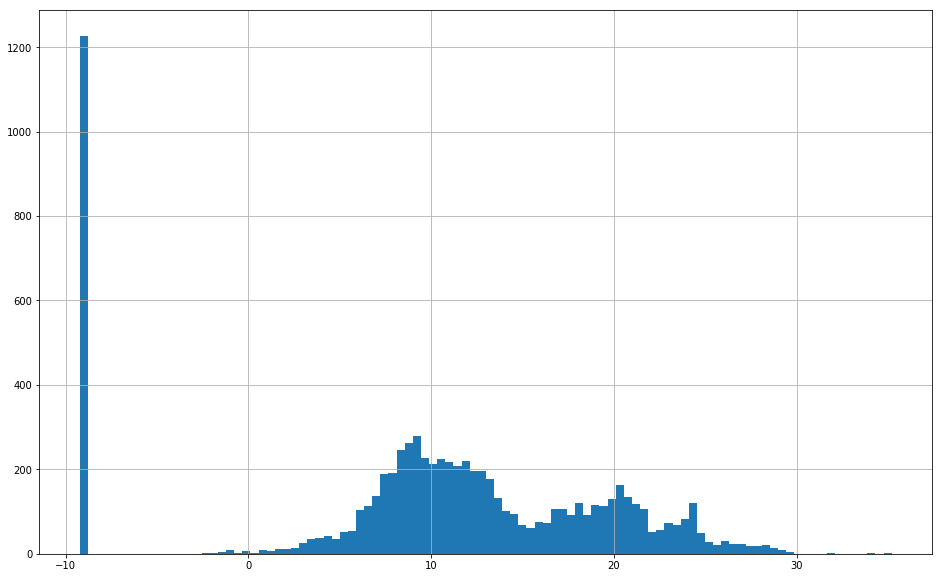

In [3]:
grouped = df.groupby(
    ['year','month','day','hour']
).agg({
    'latitudeE7': ['median', 'var', 'count'],
    'longitudeE7': ['median', 'var', 'count']
})

utils.log(grouped.latitudeE7["var"]).hist(bins=100, figsize=(16, 10))

In [4]:
df['movement'] = utils.movement(df)

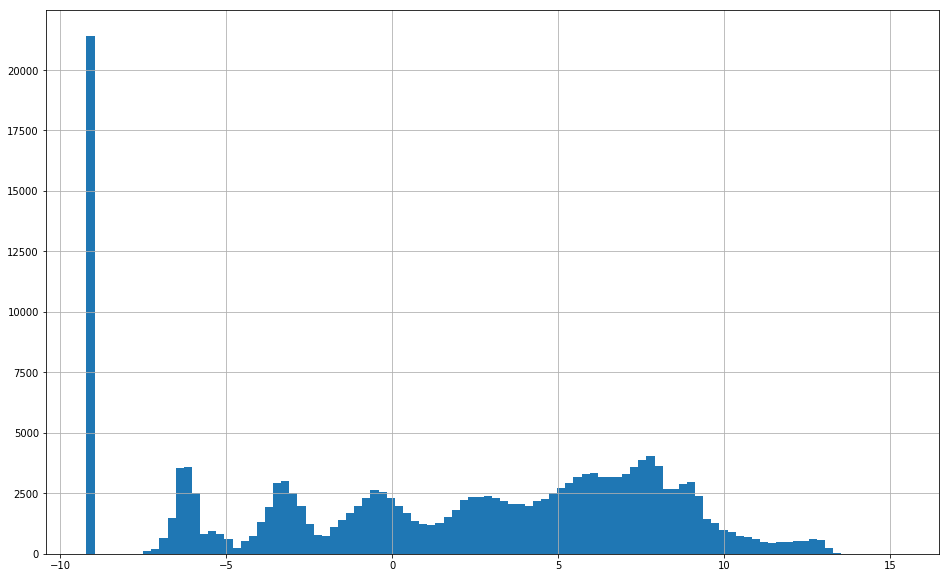

In [5]:
(
    utils
    .log(df.movement)
    .rolling(5, center=True).mean()
    .hist(bins=100, figsize=(16, 10))
)

In [6]:
import imp
imp.reload(utils)

<module 'utils' from '/Users/brunolannoo/IdeaProjects/Personal/LocationAnalysis/src/utils.py'>

,duration
,sum
count,159.000000
mean,8.107747
std,3.035662
min,0.004158
25%,7.744782
50%,8.466450
75%,9.119116
max,14.826695


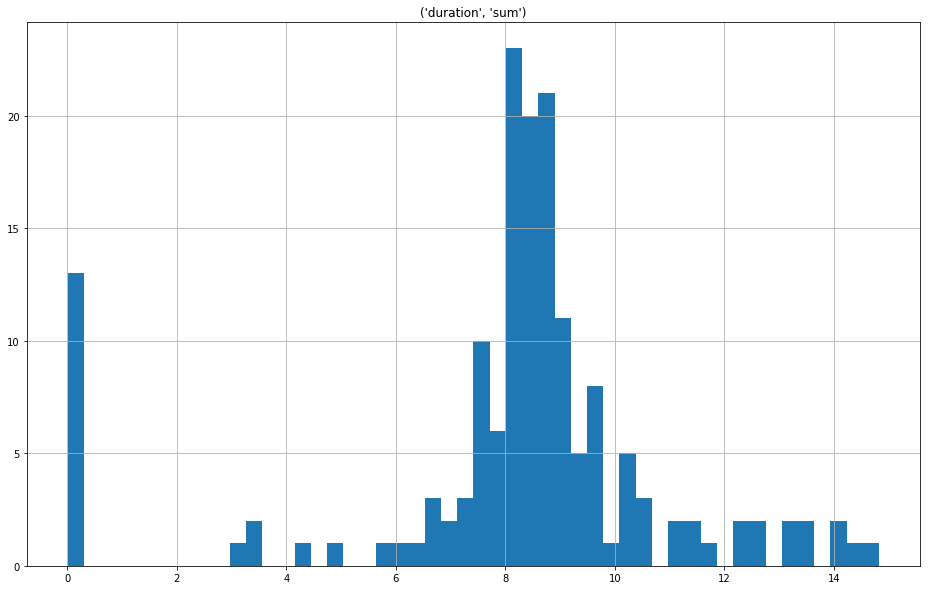

In [7]:
min_x_kunlabora = 47_126_000
max_x_kunlabora = 47_140_000
min_y_kunlabora = 508_831_000
max_y_kunlabora = 508_838_000

hours_at_work = (
    df[(df.longitudeE7 > min_x_kunlabora) 
       & (df.longitudeE7 < max_x_kunlabora)
       & (df.latitudeE7 > min_y_kunlabora)
       & (df.latitudeE7 < max_y_kunlabora)]
    .groupby(['year', 'month', 'day'])
    .agg({'duration': ['sum']})
)

hours_at_work.hist(bins=50, figsize=(16, 10))

hours_at_work.describe()

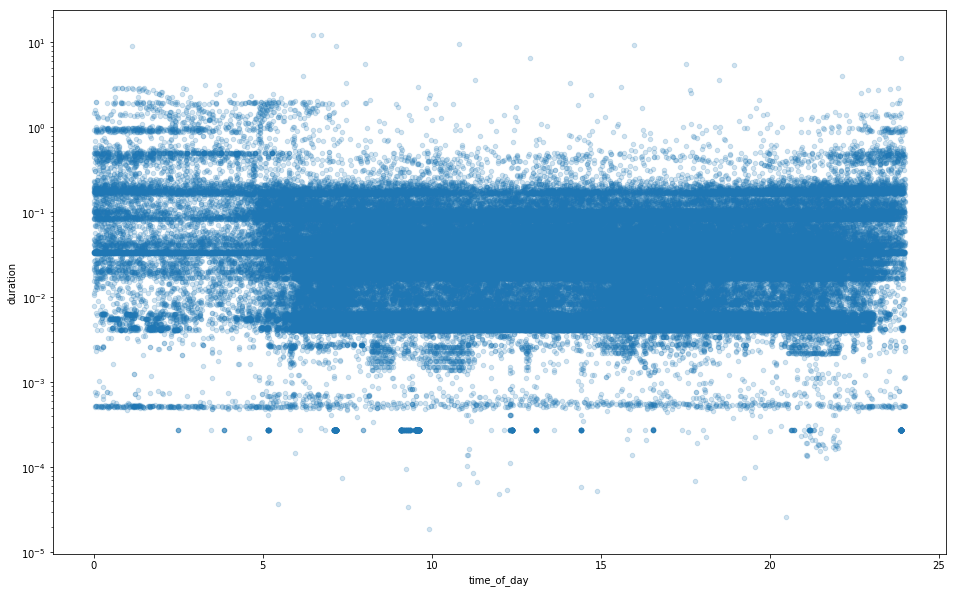

In [8]:
df.plot(x='time_of_day', y='duration', alpha=0.2, kind='scatter', logy=True, figsize=(16, 10))